# Business Problem -

 **About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**Objectives**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

Dataset

Dataset Link: delhivery_data.csv

**Column Profiling:**

data - tells whether the data is testing or training data

trip_creation_time – Timestamp of trip creation

route_schedule_uuid – Unique Id for a particular route schedule

route_type – Transportation type

FTL – Full Truck Load: FTL shipments get to the destination 
sooner, as the truck is making no other pickups or drop-offs along the way

Carting: Handling system consisting of small vehicles (carts)

trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

source_center - Source ID of trip origin

source_name - Source Name of trip origin

destination_cente – Destination ID

destination_name – Destination Name

od_start_time – Trip start time

od_end_time – Trip end time

start_scan_to_end_scan – Time taken to deliver from source to destination

is_cutoff – Unknown field

cutoff_factor – Unknown field

cutoff_timestamp – Unknown field

actual_distance_to_destination – Distance in Kms between source and destination warehouse

actual_time – Actual time taken to complete the delivery (Cumulative)

osrm_time – An open-source routing engine time calculator which 
computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

factor – Unknown field

segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

segment_factor – Unknown field

**Concepts Used:**

Feature Creation

Relationship between Features

Column Normalization /Column Standardization

Handling categorical values

Missing values - Outlier treatment / Types of outliers

# Loading data-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import  levene, ttest_ind

In [3]:
data=pd.read_csv("delhivery.csv")
data.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


# Basic Data Exploration -

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
data.shape

(144867, 24)

In [6]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

Some of the columns are marked as unknown fields, it is safe to drop those columns-
['is_cutoff' , 'cutoff_factor' , 'cutoff_timestamp' , 'factor' , 'segment_factor' , 'data' ]

In [7]:
data.drop(['is_cutoff' , 'cutoff_factor' , 'cutoff_timestamp' , 'factor' , 'segment_factor' , 'data' ],axis=1,inplace=True)

In [8]:
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


Changing datatype of date like columns from object to datetime:

In [9]:
cols=['trip_creation_time','od_start_time','od_end_time']
for col in cols:
  data[col]=pd.to_datetime(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144867 non-null  float64

Missing values -

In [10]:
data.isnull().sum()

trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

Some rows have source_name and destinations_name as null, so we extract those rowns which have non null elements

In [11]:
data=data[~(data['source_name'].isnull() | data['destination_name'].isnull())]

In [12]:
data.shape

(144316, 18)

Checking for duplicate rows -

In [13]:
data.duplicated().sum()

0

# Basic data cleaning - Merging rows based on Trip_UUID



##- Grouping stage 1 - on ['trip_uuid', 'source_center', 'destination_center']

In [14]:
data[data['trip_uuid']=='trip-153741093647649320']  # checking layout of data # multiple rows based on individual segments-
# Goal is to combine rows to get 1 row per trip id from source to destination -

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [15]:
grouped_df_1 = data.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(
        
    trip_creation_time = ("trip_creation_time", "first"),
    route_type = ("route_type", "first"),
    source_name = ("source_name", "first"),
    destination_name = ("destination_name", "first"),
    od_start_time = ("od_start_time", "first"),
    od_end_time = ("od_end_time", "first"),
    start_scan_to_end_scan = ("start_scan_to_end_scan", "first"),
    actual_distance_to_destination = ("actual_distance_to_destination", "last"),  # Last value of cumulative columns
    actual_time = ("actual_time", "last"),
    osrm_time = ("osrm_time", "last"),
    osrm_distance = ("osrm_distance", "last"),
    total_segment_actual_time = ("segment_actual_time", "sum"),
    total_segment_osrm_time = ("segment_osrm_time", "sum"),
    total_segment_osrm_distance = ("segment_osrm_distance", "sum")
    
    ).sort_values(by=['trip_uuid', 'od_start_time'])

grouped_df_1

trip_creation_time  \
trip_uuid               source_center destination_center                              
trip-153671041653548748 IND462022AAA  IND209304AAA       2018-09-12 00:00:16.535741   
                        IND209304AAA  IND000000ACB       2018-09-12 00:00:16.535741   
trip-153671042288605164 IND572101AAA  IND561203AAB       2018-09-12 00:00:22.886430   
                        IND561203AAB  IND562101AAA       2018-09-12 00:00:22.886430   
trip-153671043369099517 IND562132AAA  IND000000ACB       2018-09-12 00:00:33.691250   
...                                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA       2018-10-03 23:59:14.390954   
                        IND627657AAA  IND628613AAA       2018-10-03 23:59:14.390954   
                        IND628613AAA  IND627005AAA       2018-10-03 23:59:14.390954   
trip-153861118270144424 IND583201AAA  IND583119AAA       2018-10-03 23:59:42.701692   
                        IND583119AAA  IND583101AAA       2018-10-03 23:59:42.701692   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND462022AAA  IND209304AAA              FTL   
                        IND209304AAA  IND000000ACB              FTL   
trip-153671042288605164 IND572101AAA  IND561203AAB          Carting   
                        IND561203AAB  IND562101AAA          Carting   
trip-153671043369099517 IND562132AAA  IND000000ACB              FTL   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA          Carting   
                        IND627657AAA  IND628613AAA          Carting   
                        IND628613AAA  IND627005AAA          Carting   
trip-153861118270144424 IND583201AAA  IND583119AAA              FTL   
                        IND583119AAA  IND583101AAA              FTL   

                                                                                    source_name  \
trip_uuid               source_center destination_center                                          
trip-153671041653548748 IND462022AAA  IND209304AAA           Bhopal_Trnsport_H (Madhya Pradesh)   
                        IND209304AAA  IND000000ACB           Kanpur_Central_H_6 (Uttar Pradesh)   
trip-153671042288605164 IND572101AAA  IND561203AAB                Tumkur_Veersagr_I (Karnataka)   
                        IND561203AAB  IND562101AAA            Doddablpur_ChikaDPP_D (Karnataka)   
trip-153671043369099517 IND562132AAA  IND000000ACB             Bangalore_Nelmngla_H (Karnataka)   
...                                                                                         ...   
trip-153861115439069069 IND628204AAA  IND627657AAA           Tirchchndr_Shnmgprm_D (Tamil Nadu)   
                        IND627657AAA  IND628613AAA        Thisayanvilai_UdnkdiRD_D (Tamil Nadu)   
                        IND628613AAA  IND627005AAA            Peikulam_SriVnktpm_D (Tamil Nadu)   
trip-153861118270144424 IND583201AAA  IND583119AAA                           Hospet (Karnataka)   
                        IND583119AAA  IND583101AAA                Sandur_WrdN1DPP_D (Karnataka)   

                                                                               destination_name  \
trip_uuid               source_center destination_center                                          
trip-153671041653548748 IND462022AAA  IND209304AAA           Kanpur_Central_H_6 (Uttar Pradesh)   
                        IND209304AAA  IND000000ACB                Gurgaon_Bilaspur_HB (Haryana)   
trip-153671042288605164 IND572101AAA  IND561203AAB            Doddablpur_ChikaDPP_D (Karnataka)   
                        IND561203AAB  IND562101AAA            Chikblapur_ShntiSgr_D (Karnataka)   
trip-153671043369099517 IND562132AAA  IND000000ACB                Gurgaon_Bilaspur_HB (Haryana)   
...                         

### - Grouping stage 2 - on Trip_uuid

In [16]:
grouped_df_2 = grouped_df_1.groupby(['trip_uuid']).agg(
    trip_creation_time = ("trip_creation_time", "first"),
    route_type = ("route_type", "first"),
    source_name = ("source_name", "first"),
    destination_name = ("destination_name", "last"),
    od_start_time = ("od_start_time", "first"),
    od_end_time = ("od_end_time", "last"),
    start_scan_to_end_scan = ("start_scan_to_end_scan", "sum"),
    actual_distance_to_destination = ("actual_distance_to_destination", "sum"),  # total of both rows
    actual_time = ("actual_time", "sum"),
    osrm_time = ("osrm_time", "sum"),
    osrm_distance = ("osrm_distance", "sum"),
    segment_actual_time = ("total_segment_actual_time", "sum"),
    segment_osrm_time = ("total_segment_osrm_time", "sum"),
    segment_osrm_distance = ("total_segment_osrm_distance", "sum")
)
grouped_df_2

,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866


So we aggregated and created group 1 and then group 2 to get a row for each trip id - 

In [17]:
grouped_df_1.loc[['trip-153741093647649320']]

trip_creation_time  \
trip_uuid               source_center destination_center                              
trip-153741093647649320 IND388121AAA  IND388620AAB       2018-09-20 02:35:36.476840   
                        IND388620AAB  IND388320AAA       2018-09-20 02:35:36.476840   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153741093647649320 IND388121AAA  IND388620AAB          Carting   
                        IND388620AAB  IND388320AAA          Carting   

                                                                            source_name  \
trip_uuid               source_center destination_center                                  
trip-153741093647649320 IND388121AAA  IND388620AAB           Anand_VUNagar_DC (Gujarat)   
                        IND388620AAB  IND388320AAA        Khambhat_MotvdDPP_D (Gujarat)   

                                                                       destination_name  \
trip_uuid               source_center destination_center                                  
trip-153741093647649320 IND388121AAA  IND388620AAB        Khambhat_MotvdDPP_D (Gujarat)   
                        IND388620AAB  IND388320AAA           Anand_Vaghasi_IP (Gujarat)   

                                                                      od_start_time  \
trip_uuid               source_center destination_center                              
trip-153741093647649320 IND388121AAA  IND388620AAB       2018-09-20 03:21:32.418600   
                        IND388620AAB  IND388320AAA       2018-09-20 04:47:45.236797   

                                                                        od_end_time  \
trip_uuid               source_center destination_center                              
trip-153741093647649320 IND388121AAA  IND388620AAB       2018-09-20 04:47:45.236797   
                        IND388620AAB  IND388320AAA       2018-09-20 06:36:55.627764   

                                                          start_scan_to_end_scan  \
trip_uuid               source_center destination_center                           
trip-153741093647649320 IND388121AAA  IND388620AAB                          86.0   
                        IND388620AAB  IND388320AAA                         109.0   

                                                          actual_distance_to_destination  \
trip_uuid               source_center destination_center                                   
trip-153741093647649320 IND388121AAA  IND388620AAB                             39.386040   
                        IND388620AAB  IND388320AAA                             43.595802   

                                                          actual_time  \
trip_uuid               source_center destination_center                
trip-153741093647649320 IND388121AAA  IND388620AAB               68.0   
                        IND388620AAB  IND388320AAA              102.0   

                                                          osrm_time  \
trip_uuid               source_center destination_center              
trip-153741093647649320 IND388121AAA  IND388620AAB             44.0   
                        IND388620AAB  IND388320AAA             45.0   

                                                          osrm_distance  \
trip_uuid               source_center destination_center                  
trip-153741093647649320 IND388121AAA  IND388620AAB              54.2181   
                        IND388620AAB  IND388320AAA              53.2334   

                                                          total_segment_actual_time  \
trip_uuid               source_center destination_center                              
trip-153741093647649320 IND388121AAA  IND388620AAB                             67.0   
                        IND388620AAB  IND388320AAA                            100.0   

                                                          total_segme

In [18]:
grouped_df_2.loc[['trip-153741093647649320']]

,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,
trip-153741093647649320,2018-09-20 02:35:36.476840,Carting,Anand_VUNagar_DC (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,195.0,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


Now we will work on the above grouped_df_2 dataframe for further analysis.

Lets create a copy of it in data

In [19]:
df=grouped_df_2
df.shape

(14787, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14787 entries, trip-153671041653548748 to trip-153861118270144424
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              14787 non-null  datetime64[ns]
 1   route_type                      14787 non-null  object        
 2   source_name                     14787 non-null  object        
 3   destination_name                14787 non-null  object        
 4   od_start_time                   14787 non-null  datetime64[ns]
 5   od_end_time                     14787 non-null  datetime64[ns]
 6   start_scan_to_end_scan          14787 non-null  float64       
 7   actual_distance_to_destination  14787 non-null  float64       
 8   actual_time                     14787 non-null  float64       
 9   osrm_time                       14787 non-null  float64       
 10  osrm_distance                   147

In [21]:
df.head(3)

,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,
trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678


# Feature extraction-

- Extracting  year, month, day from  trip_creation_time -

In [22]:
df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_day']=df['trip_creation_time'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14787 entries, trip-153671041653548748 to trip-153861118270144424
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              14787 non-null  datetime64[ns]
 1   route_type                      14787 non-null  object        
 2   source_name                     14787 non-null  object        
 3   destination_name                14787 non-null  object        
 4   od_start_time                   14787 non-null  datetime64[ns]
 5   od_end_time                     14787 non-null  datetime64[ns]
 6   start_scan_to_end_scan          14787 non-null  float64       
 7   actual_distance_to_destination  14787 non-null  float64       
 8   actual_time                     14787 non-null  float64       
 9   osrm_time                       14787 non-null  float64       
 10  osrm_distance                   147

In [23]:
df.drop(['trip_creation_time'],axis=1,inplace=True)
df.head(3)

,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day
trip_uuid,,,,,,,,,,,,,,,,
trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2018,9,12
trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,9,12
trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2018,9,12


- Creating feature 'Timediff_start_end_H' = diff(od_start_time, od_end_time)

In [24]:
df['Timediff_start_end_H']=round((df['od_end_time']-df['od_start_time'])/pd.Timedelta(minutes=1),2)

In [25]:
df.drop(['od_start_time','od_end_time'],axis=1,inplace=True)
df.head(3)

,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,Timediff_start_end_H
trip_uuid,,,,,,,,,,,,,,,
trip-153671041653548748,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2018,9,12,2260.11
trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,9,12,181.61
trip-153671043369099517,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2018,9,12,3934.36


- Extracting features like source city , source state, destination city , destination state -

In [26]:
df['source_state'] = df['source_name'].str.split('(').str[1].str.slice(0,-1)
df[['source_city', 'source_place', 'source_code']] = df['source_name'].str.split('(').str[0].str.strip().str.split('_', 2, expand=True)

df['destination_state'] = df['destination_name'].str.split('(').str[1].str.slice(0,-1)
df[['destination_city', 'destination_place', 'destination_code']] = df['destination_name'].str.split('(').str[0].str.strip().str.split('_', 2, expand=True)


Now we can drop the original columns of souce_name and destination_name - 

In [27]:
df.drop(['source_name','destination_name'],axis=1,inplace=True)
df.head(3)

,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,...,trip_creation_day,Timediff_start_end_H,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,FTL,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2018,...,12,2260.11,Madhya Pradesh,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB
trip-153671042288605164,Carting,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,...,12,181.61,Karnataka,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D
trip-153671043369099517,FTL,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2018,...,12,3934.36,Karnataka,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H


# In depth analysis -

###  Continous variables -

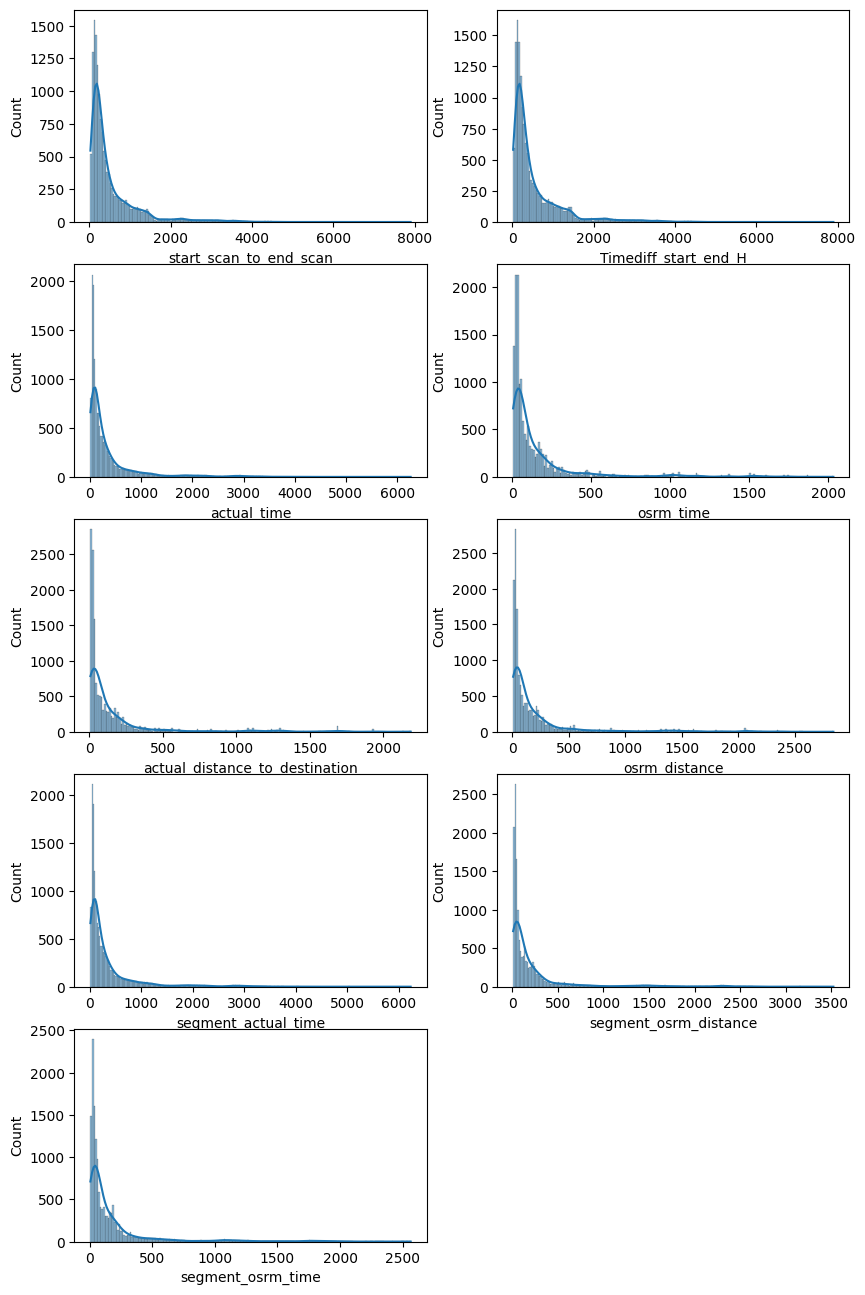

In [28]:
plt.figure(figsize=(10,16))

plt.subplot(5,2,1)
sns.histplot(data=df,x='start_scan_to_end_scan',kde=True)

plt.subplot(5,2,2)
sns.histplot(data=df,x='Timediff_start_end_H',kde=True)

plt.subplot(5,2,3)
sns.histplot(data=df,x='actual_time',kde=True)

plt.subplot(5,2,4)
sns.histplot(data=df,x='osrm_time',kde=True)

plt.subplot(5,2,5)
sns.histplot(data=df,x='actual_distance_to_destination',kde=True)

plt.subplot(5,2,6)
sns.histplot(data=df,x='osrm_distance',kde=True)

plt.subplot(5,2,7)
sns.histplot(data=df,x='segment_actual_time',kde=True)

plt.subplot(5,2,8)
sns.histplot(data=df,x='segment_osrm_distance',kde=True)

plt.subplot(5,2,9)
sns.histplot(data=df,x='segment_osrm_time',kde=True)

plt.show()

Let us see if there is a statistically significant difference between above piars of variables  by performing appropriate tests in the next section.

In [29]:
df['trip_creation_month'].value_counts()

9     13011
10     1776
Name: trip_creation_month, dtype: int64

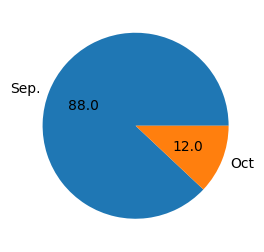

In [30]:
plt.figure(figsize=(3,4))
plt.pie(df['trip_creation_month'].value_counts(),labels = ['Sep.','Oct'],autopct='%.1f')
plt.show()

Most of the trips in the data are created in month of September and October.

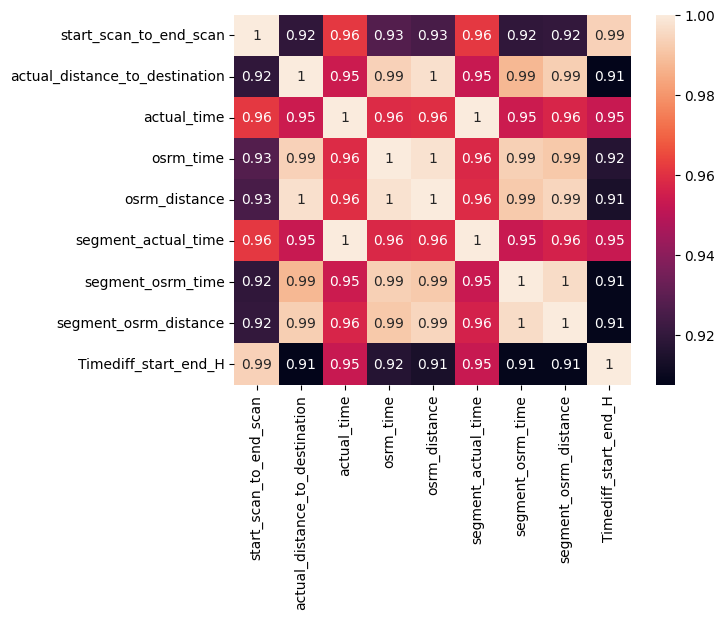

In [31]:
sns.heatmap(df[['route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'Timediff_start_end_H']].corr(), annot=True)
plt.show()

Most of the time and distance aggregated fields are highly correlated. E.g.-

- start_scan_to_end_scan time is highly correlated with actual_time,osrm_time,segment_osrm_time.

- actual_distance_to_destination is highly correlated to osrm_distance, segement_osrm_distance


### Categorical variables -


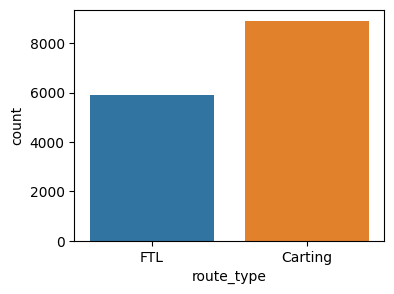

In [32]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='route_type')
plt.show()

Most of the orders use carts and less use Full Truck Load.

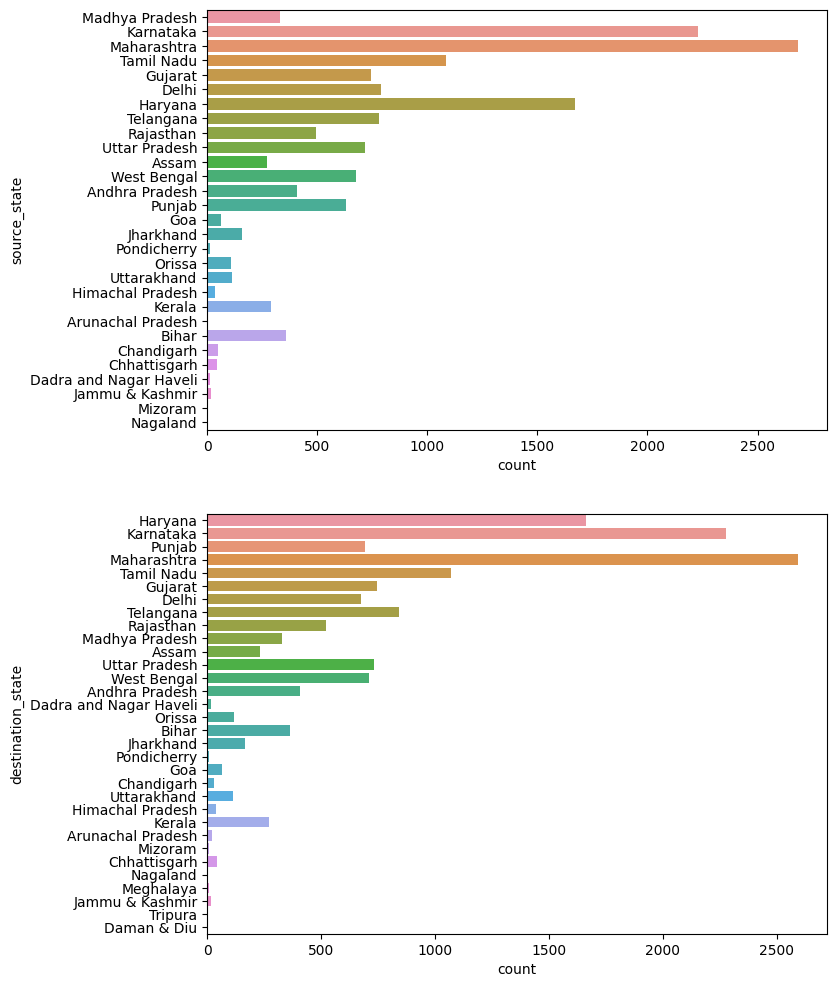

In [33]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.countplot(data=df,y='source_state')

plt.subplot(2,1,2)
sns.countplot(data=df,y='destination_state')

plt.show()

Most of the orders originate and end in states of - Maharashtra , Karnataka

### Outlier Detection and treatment-



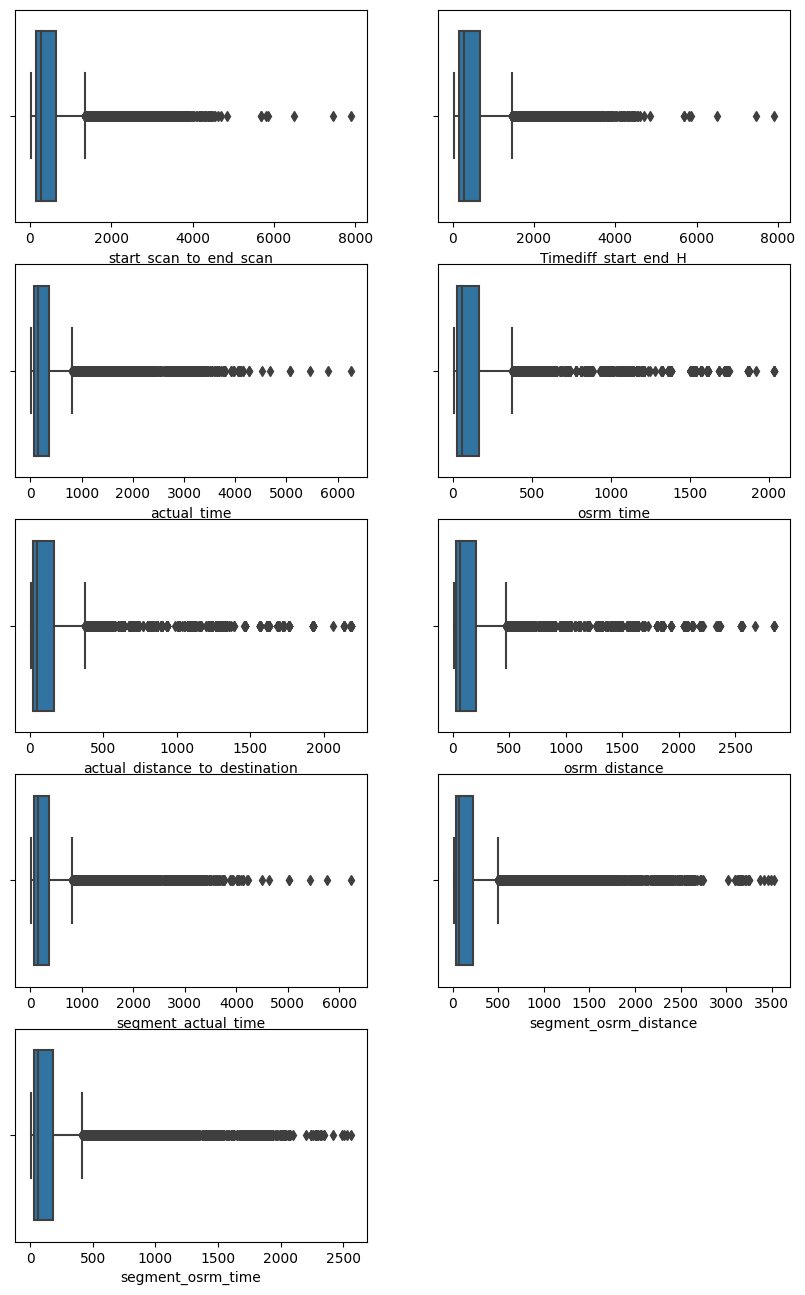

In [34]:
plt.figure(figsize=(10,16))

plt.subplot(5,2,1)
sns.boxplot(data=df,x='start_scan_to_end_scan')

plt.subplot(5,2,2)
sns.boxplot(data=df,x='Timediff_start_end_H')

plt.subplot(5,2,3)
sns.boxplot(data=df,x='actual_time')

plt.subplot(5,2,4)
sns.boxplot(data=df,x='osrm_time')

plt.subplot(5,2,5)
sns.boxplot(data=df,x='actual_distance_to_destination')

plt.subplot(5,2,6)
sns.boxplot(data=df,x='osrm_distance')

plt.subplot(5,2,7)
sns.boxplot(data=df,x='segment_actual_time')

plt.subplot(5,2,8)
sns.boxplot(data=df,x='segment_osrm_distance')

plt.subplot(5,2,9)
sns.boxplot(data=df,x='segment_osrm_time')

plt.show()

Almost all variables show a long continous tail of data points.

In [35]:
# outlier detection
def check_outlier(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  low=q1 - (1.5 * iqr)
  high=q3 + (1.5 * iqr)
  return low,high

In [36]:
# outlier treatment
num_col=['start_scan_to_end_scan','Timediff_start_end_H','actual_time',\
         'osrm_time','actual_distance_to_destination','osrm_distance',\
         'segment_actual_time','segment_osrm_distance','segment_osrm_time']
for col in num_col:
  low,high=check_outlier(df[col])
  df[col]=df[col].clip(lower=low,upper=high)

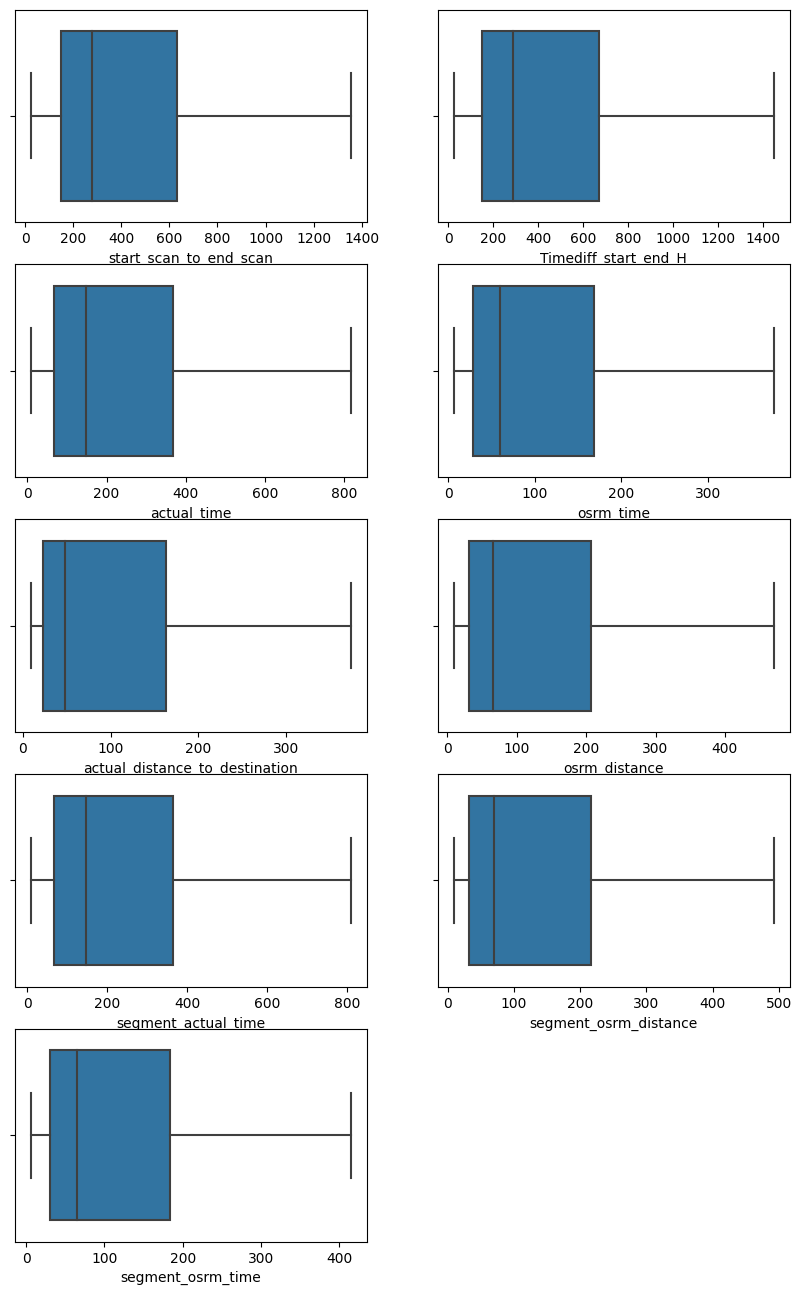

In [37]:
# Checking results 
plt.figure(figsize=(10,16))

plt.subplot(5,2,1)
sns.boxplot(data=df,x='start_scan_to_end_scan')

plt.subplot(5,2,2)
sns.boxplot(data=df,x='Timediff_start_end_H')

plt.subplot(5,2,3)
sns.boxplot(data=df,x='actual_time')

plt.subplot(5,2,4)
sns.boxplot(data=df,x='osrm_time')

plt.subplot(5,2,5)
sns.boxplot(data=df,x='actual_distance_to_destination')

plt.subplot(5,2,6)
sns.boxplot(data=df,x='osrm_distance')

plt.subplot(5,2,7)
sns.boxplot(data=df,x='segment_actual_time')

plt.subplot(5,2,8)
sns.boxplot(data=df,x='segment_osrm_distance')

plt.subplot(5,2,9)
sns.boxplot(data=df,x='segment_osrm_time')

plt.show()

All outliers are clipped at upper and lower ends.

### Busiest corridor -

In [38]:
df.groupby(['source_city','destination_city']).agg(
    count= ('actual_time','count'),
    avg_distance = ("actual_distance_to_destination", "mean"),
    avg_time = ("actual_time", "mean")
).sort_values(by='count',ascending=False).reset_index().head(10)

,source_city,destination_city,count,avg_distance,avg_time
0,Bengaluru,Bengaluru,549,32.252836,88.089253
1,Bangalore,Bengaluru,455,27.056047,77.720879
2,Hyderabad,Hyderabad,398,70.352693,177.092965
3,Bhiwandi,Mumbai,332,23.004948,78.391566
4,Bengaluru,Bangalore,326,27.675542,92.223926
5,Mumbai,Mumbai,264,16.221021,69.140152
6,Chandigarh,Chandigarh,250,157.314696,360.488000
7,Gurgaon,Delhi,240,48.673475,125.929167
8,Mumbai Hub,Mumbai,227,16.341615,56.938326
9,Mumbai,Bhiwandi,207,21.589225,94.516908


The most busiest city routes are  Bangalore, Mumbai, Hyderabad.

In [39]:
df.groupby(['source_state','destination_state']).agg(
    count= ('actual_time','count'),
    avg_distance = ("actual_distance_to_destination", "mean"),
    avg_time = ("actual_time", "mean")
).sort_values(by='count',ascending=False).reset_index().head(10)

,source_state,destination_state,count,avg_distance,avg_time
0,Maharashtra,Maharashtra,2406,56.674706,154.074397
1,Karnataka,Karnataka,2015,53.884663,136.287841
2,Tamil Nadu,Tamil Nadu,1016,70.125746,152.336614
3,Haryana,Haryana,867,86.752840,205.523645
4,Telangana,Telangana,655,85.939979,202.000000
5,Gujarat,Gujarat,624,78.209488,166.185897
6,West Bengal,West Bengal,610,78.962721,271.155738
7,Uttar Pradesh,Uttar Pradesh,544,98.524568,304.036765
8,Punjab,Punjab,491,135.205238,286.484725
9,Rajasthan,Rajasthan,422,135.354563,302.917062


Most busiest states are Maharshtra and Karnataka.

### Hypothesis tests -


 **1)** diff(od_start_time-od.end_time)= 'Timediff_start_end_H' and 'start_scan_to_end_scan'

 - Visual check -

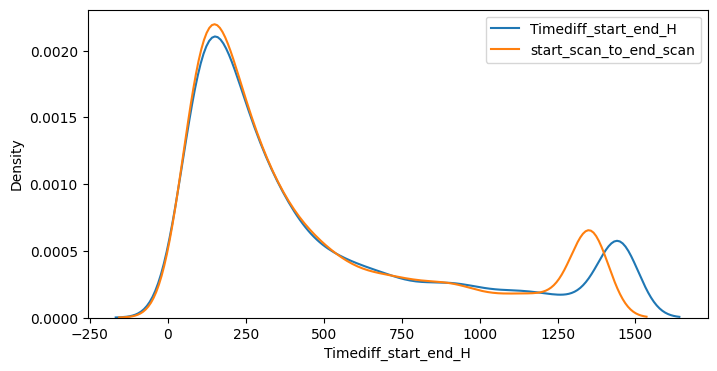

In [40]:
# Visual check
plt.figure(figsize=(8,4))
sns.kdeplot(df['Timediff_start_end_H'], label ='Timediff_start_end_H')
sns.kdeplot(df['start_scan_to_end_scan'], label ='start_scan_to_end_scan')
plt.legend()
plt.show()

- Hypothesis test- We will perform a 2 sample t test -
 
  𝝻o , 𝝻a  : means of 'start_scan_to_end_scan' and 'Timediff_start_end_H
 
  Ho : 𝝻o = 𝝻a  no difference betweeen means of both data
 
  Ha : 𝝻o != 𝝻a there is a statistically significant difference

In [41]:
t_stat,p_val=ttest_ind(df['Timediff_start_end_H'],df['start_scan_to_end_scan'])
print(p_val)
if p_val < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

9.10474074712823e-06
reject HO


Reject null hypothesis. The difference is statistically significant.

 **2)** actual_time_aggregated value and osrm_time_aggregated value

 - Visual check -

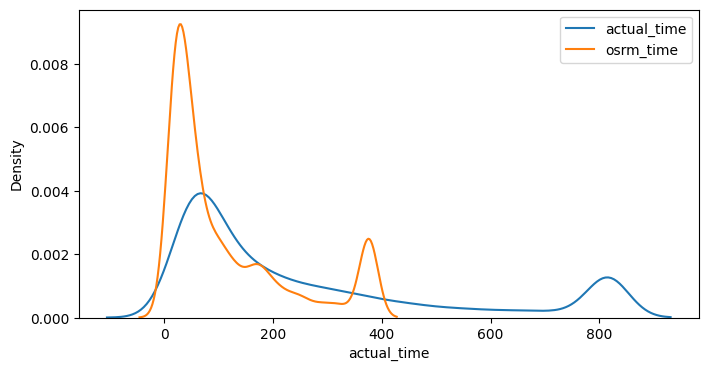

In [42]:
# Visual check
plt.figure(figsize=(8,4))
sns.kdeplot(df['actual_time'], label ='actual_time')
sns.kdeplot(df['osrm_time'], label ='osrm_time')
plt.legend()
plt.show()

- Hypothesis test- We will perform a 2 sample t test -
 
  𝝻o , 𝝻a  : means of 'actual_time' and 'osrm_time'
 
  Ho : 𝝻o = 𝝻a  no difference betweeen means of both data
 
  Ha : 𝝻o != 𝝻a there is a statistically significant difference

In [43]:
# Hypothesis test
t_stat,p_val=ttest_ind(df['actual_time'],df['osrm_time'])
print(p_val)
if p_val < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

0.0
reject HO


We have enough evidence to reject the null hypothesis. That means there is statitically significant difference between actual time aggregated value and osrm time aggregated value.

 **3)** actual_time_aggregated value and segment_actual_time_aggregated value

 - Visual check -

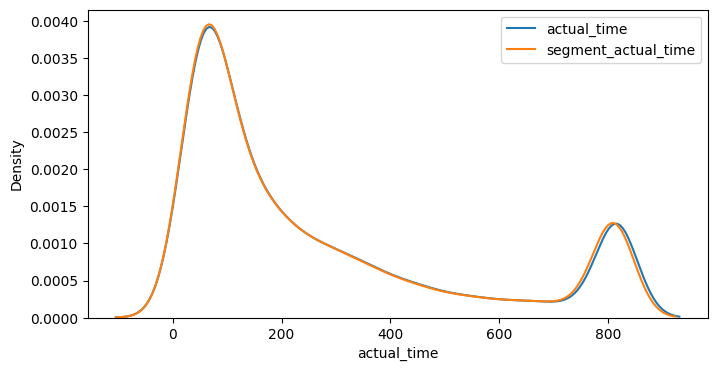

In [44]:
# Visual check
plt.figure(figsize=(8,4))
sns.kdeplot(df['actual_time'], label ='actual_time')
sns.kdeplot(df['segment_actual_time'], label ='segment_actual_time')
plt.legend()
plt.show()

- Hypothesis test- We will perform a 2 sample t test -
 
  𝝻o , 𝝻a  : means of 'actual_time' and 'segment_actual_time'
 
  Ho : 𝝻o = 𝝻a  no difference betweeen means of both data
 
  Ha : 𝝻o != 𝝻a there is a statistically significant difference

In [45]:
# Hypothesis test
t_stat,p_val=ttest_ind(df['actual_time'],df['segment_actual_time'])
print(p_val)
if p_val < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

0.44925691028431425
fail to reject HO


Fail to reject null hypothesis. This implies that there is no difference between segment_actual_time and actual_time.

 **4)** osrm_time_aggregated value and segment_osrm_time_aggregated value

 - Visual check -

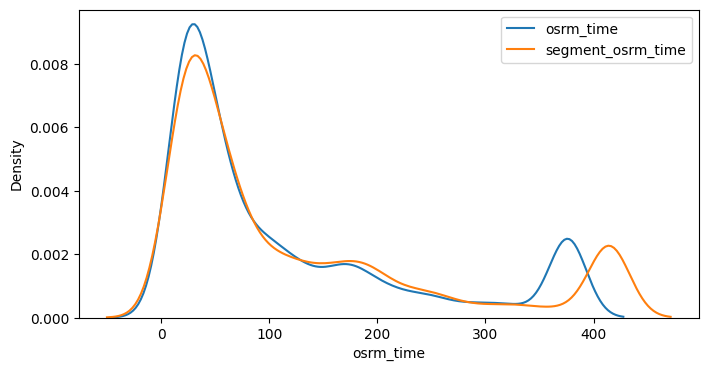

In [46]:
# Visual check
plt.figure(figsize=(8,4))
sns.kdeplot(df['osrm_time'], label ='osrm_time')
sns.kdeplot(df['segment_osrm_time'], label ='segment_osrm_time')
plt.legend()
plt.show()

- Hypothesis test- We will perform a 2 sample t test -
 
  𝝻o , 𝝻a  : means of 'osrm_time' and 'segment_osrm_time'
 
  Ho : 𝝻o = 𝝻a  no difference betweeen means of both data
 
  Ha : 𝝻o != 𝝻a there is a statistically significant difference

In [47]:
# Hypothesis test
t_stat,p_val=ttest_ind(df['osrm_time'],df['segment_osrm_time'])
print(p_val)
if p_val < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

6.004353019844908e-15
reject HO


Reject null hypothesis. The difference is statistically significant.

 **5)** osrm_distance_aggregated value and segment_osrm_distance_aggregated value

 - Visual check -

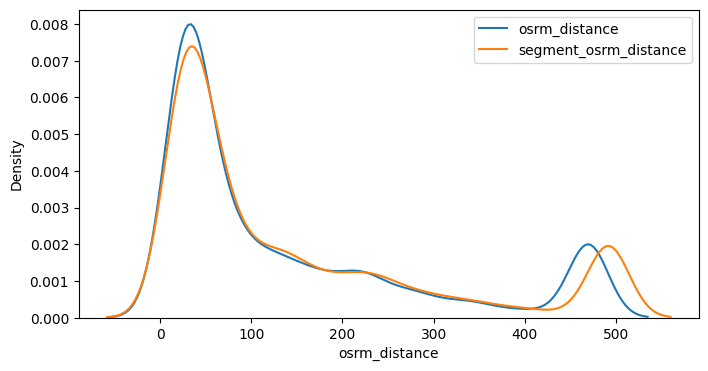

In [48]:
# Visual check
plt.figure(figsize=(8,4))
sns.kdeplot(df['osrm_distance'], label ='osrm_distance')
sns.kdeplot(df['segment_osrm_distance'], label ='segment_osrm_distance')
plt.legend()
plt.show()

- Hypothesis test- We will perform a 2 sample t test -
 
  𝝻o , 𝝻a  : means of 'osrm_distance' and 'segment_osrm_distance'
 
  Ho : 𝝻o = 𝝻a  no difference betweeen means of both data
 
  Ha : 𝝻o != 𝝻a there is a statistically significant difference

In [49]:
# Hypothesis test
t_stat,p_val=ttest_ind(df['osrm_distance'],df['segment_osrm_distance'])
print(p_val)
if p_val < 0.05:
  print("reject HO")
else:
  print("fail to reject HO")

2.1937831694487757e-06
reject HO


Reject null hypothesis. The difference is statistically significant.

### Categorical variable encoding -

In [50]:
# Since there are only 2 values for the categorical variable of route_type we use label encoder

from sklearn.preprocessing import LabelEncoder 

print('Before Label Encoding')
print(df['route_type'].value_counts())

label_encoder=LabelEncoder()
df['route_type']=label_encoder.fit_transform(df['route_type'])

print('After Label Encoding')
print(df['route_type'].value_counts())

Before Label Encoding
Carting    8906
FTL        5881
Name: route_type, dtype: int64
After Label Encoding
0    8906
1    5881
Name: route_type, dtype: int64


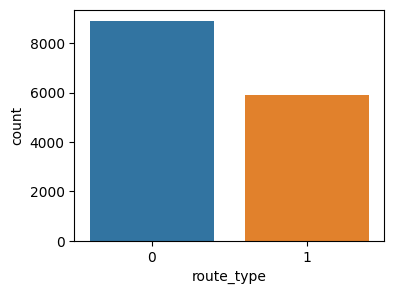

In [51]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='route_type')
plt.show()

Other categorical features like source city, destinamtion city, source name, destination name have large number of values so one hot encoding is not possible. 

I leave that part for now.

### Column Standardization-

In [52]:
df.columns

Index(['route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code'],
      dtype='object')

In [53]:
df_num=df[['route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H']]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df_num)
std_data = pd.DataFrame(std_data, columns = df_num.columns)
std_data . head(3)

,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,Timediff_start_end_H
0,1.230597,2.223281,2.281370,2.141392,2.255661,2.271659,2.141970,2.259726,2.254747,0.0,-0.369459,-0.808828,2.254825
1,-0.812614,-0.666050,-0.302255,-0.460518,-0.400293,-0.358333,-0.462704,-0.473161,-0.401315,0.0,-0.369459,-0.808828,-0.672091
2,1.230597,2.223281,2.281370,2.141392,2.255661,2.271659,2.141970,2.259726,2.254747,0.0,-0.369459,-0.808828,2.254825


# Insights

-There is statistically significant difference between actual time aggregated value and osrm time aggregated value.

-There is statistically significant difference between diff(od_start_time-od.end_time)= 'Timediff_start_end_H' and 'start_scan_to_end_scan'.

-There is no difference between segment_actual_time and actual_time.

-There is statistically significant difference between osrm_time_aggregated value and segment_osrm_time_aggregated value.

-There is statistically significant difference between osrm_distance_aggregated value and segment_osrm_distance_aggregated value.

-Most orders source and destination states are Maharashtra and Karnataka.

-Most of the time and distance aggregated fields are highly correlated. E.g.-

- start_scan_to_end_scan time is highly correlated with actual_time,osrm_time,segment_osrm_time.

- actual_distance_to_destination is highly correlated to osrm_distance, segement_osrm_distance

-Most of the trips in the data are created in month of September and October.

-Most of the orders use carts and less use Full Truck Load.


# Recommendations 

-Since there is a significant difference between OSRM and actual parameters, the company should revisit information fed to routing engine for trip planning. 

-These difference should be reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.

-Since there is heavy traffic in Mahrashtra followed by Karnataka, the company should plan for enough resources on ground in these 2 states on priority for example during festive seasons.

-Since most of the trips are taking place in tier 1 cities like bangalore, mumbai and hyderabad and are mostly inter city. There are not many interstate deliveries taking place. Team can focus on inter state orders since it can generate more revenue due to long distance parcels.

-Since least orders are reaching/coming from North East states, more corridors/campaigns can be promoted to penetrate in these states as well.